In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [7]:
data = pd.read_csv("world-happiness-report-2021.csv")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [9]:
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [10]:
data.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [11]:
data_na=data[data.isna().any(axis=1)]
data_na

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual


<AxesSubplot:>

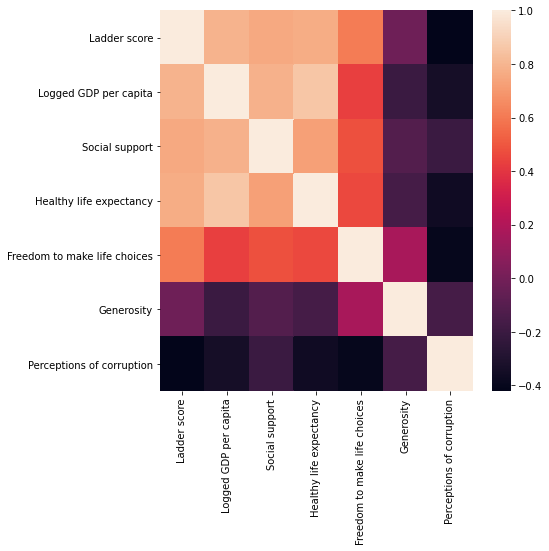

In [15]:
features=['Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
cor=data.loc[:,features].corr()

fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(ax=ax, data=cor)

In [16]:
cor

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
Logged GDP per capita,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
Social support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
Healthy life expectancy,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
Freedom to make life choices,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
Generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
Perceptions of corruption,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


In [19]:
x = data.loc[:, features].values
x_scaler = StandardScaler().fit_transform(x)

In [25]:
kmeans = KMeans(n_clusters=5).fit(data[features])
centroids = kmeans.cluster_centers_
print(centroids)
label = kmeans.fit_predict(data[features])

[[ 4.47888235e+00  7.76723529e+00  6.48294118e-01  5.25698235e+01
   6.89705882e-01  1.65294118e-02  7.79058824e-01]
 [ 6.78633333e+00  1.07575455e+01  9.12151515e-01  7.31962727e+01
   8.54484848e-01 -1.51212121e-02  5.48757576e-01]
 [ 5.74372000e+00  9.84338000e+00  8.51100000e-01  6.78091800e+01
   7.99040000e-01 -7.20600000e-02  7.88320000e-01]
 [ 5.41943478e+00  9.16700000e+00  8.35695652e-01  6.38812609e+01
   8.26869565e-01  1.60869565e-02  7.77434783e-01]
 [ 4.32576923e+00  8.28257692e+00  7.11500000e-01  5.82705769e+01
   7.32884615e-01  4.60000000e-02  7.59230769e-01]]


In [27]:
result=kmeans.labels_
data['label_kmeans']=result

In [54]:
for i in range(5):
    print('Cluster',i)
    print(data[data['label_kmeans']==i]['Country name'])

Cluster 0
29                   Guatemala
32                      Kosovo
41                  Uzbekistan
44                  Kazakhstan
60                 Philippines
64                     Moldova
66                  Kyrgyzstan
68                     Bolivia
69                    Mongolia
70                    Paraguay
75                      Russia
77                  Tajikistan
79                       Libya
81                   Indonesia
86                       Nepal
89                  Azerbaijan
93             North Macedonia
96                Turkmenistan
100                 Bangladesh
107                    Georgia
108                    Algeria
109                    Ukraine
113                   Cambodia
124    Palestinian Territories
131                      Egypt
Name: Country name, dtype: object
Cluster 1
0                       Finland
1                       Denmark
2                   Switzerland
3                       Iceland
4                   Netherlands
5          

In [55]:
for i in range(5):
    print('Cluster',i)
    print(data[data['label_kmeans']==i])

Cluster 0
                Country name                  Regional indicator  \
29                 Guatemala         Latin America and Caribbean   
32                    Kosovo          Central and Eastern Europe   
41                Uzbekistan  Commonwealth of Independent States   
44                Kazakhstan  Commonwealth of Independent States   
60               Philippines                      Southeast Asia   
64                   Moldova  Commonwealth of Independent States   
66                Kyrgyzstan  Commonwealth of Independent States   
68                   Bolivia         Latin America and Caribbean   
69                  Mongolia                           East Asia   
70                  Paraguay         Latin America and Caribbean   
75                    Russia  Commonwealth of Independent States   
77                Tajikistan  Commonwealth of Independent States   
79                     Libya        Middle East and North Africa   
81                 Indonesia          

In [39]:
print(data.groupby('label_kmeans')['Country name'].unique())

label_kmeans
0    [Guatemala, Kosovo, Uzbekistan, Kazakhstan, Ph...
1    [Finland, Denmark, Switzerland, Iceland, Nethe...
2    [Congo (Brazzaville), Senegal, Ghana, Laos, So...
3    [United States, Bahrain, Taiwan Province of Ch...
4    [Ivory Coast, Cameroon, Niger, Gambia, Benin, ...
Name: Country name, dtype: object


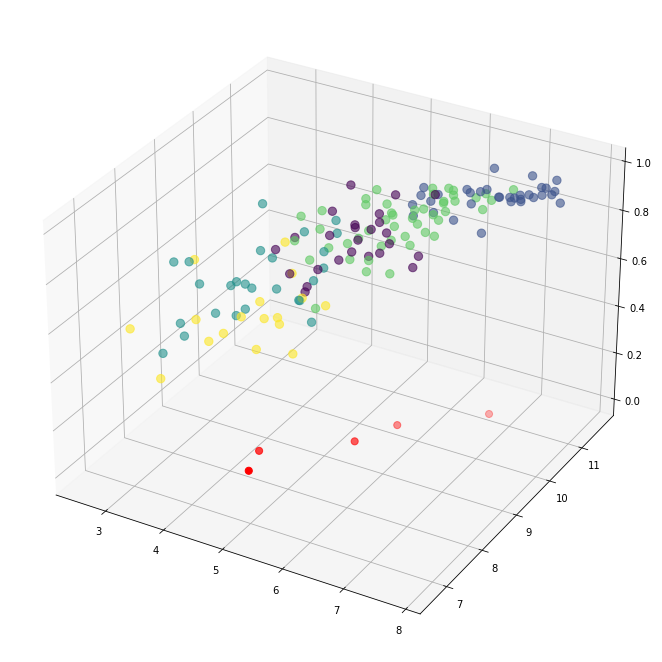

In [26]:
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)
cb = ax.scatter(x[:,0],x[:,1],x[:,2], c=label,s=70, alpha=0.6)

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)